## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
# I do not have GPU anyway

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
# min/max scaling
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
def preproc_x(x, flatten=True):
    # x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    x = mm_scaler.fit_transform(x)
    return x

# OneHot preprocess -- use the example code
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
test

(array([[[[158, 112,  49],
          [159, 111,  47],
          [165, 116,  51],
          ...,
          [137,  95,  36],
          [126,  91,  36],
          [116,  85,  33]],
 
         [[152, 112,  51],
          [151, 110,  40],
          [159, 114,  45],
          ...,
          [136,  95,  31],
          [125,  91,  32],
          [119,  88,  34]],
 
         [[151, 110,  47],
          [151, 109,  33],
          [158, 111,  36],
          ...,
          [139,  98,  34],
          [130,  95,  34],
          [120,  89,  33]],
 
         ...,
 
         [[ 68, 124, 177],
          [ 42, 100, 148],
          [ 31,  88, 137],
          ...,
          [ 38,  97, 146],
          [ 13,  64, 108],
          [ 40,  85, 127]],
 
         [[ 61, 116, 168],
          [ 49, 102, 148],
          [ 35,  85, 132],
          ...,
          [ 26,  82, 130],
          [ 29,  82, 126],
          [ 20,  64, 107]],
 
         [[ 54, 107, 160],
          [ 56, 105, 149],
          [ 45,  89, 132],
   

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
x_test

array([[ 0.23921569, -0.12156863, -0.61568627, ..., -0.83529412,
        -0.4745098 , -0.1372549 ],
       [ 0.84313725,  0.84313725,  0.84313725, ...,  0.45882353,
         0.56862745,  0.56078431],
       [ 0.23921569,  0.49019608,  0.74117647, ..., -0.94509804,
        -0.9372549 , -0.94509804],
       ...,
       [-0.84313725, -0.88235294, -0.90588235, ..., -0.80392157,
        -0.84313725, -0.63137255],
       [-0.80392157, -0.68627451, -0.90588235, ..., -0.27843137,
        -0.05882353, -0.37254902],
       [-0.42745098, -0.38823529, -0.41176471, ..., -0.78823529,
        -0.79607843, -0.79607843]])

In [8]:
"""Code Here
建立你的神經網路
"""
# to prevent running for a long time
# let's build a 5-level network
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.7291 - accuracy: 0.3857 - val_loss: 1.5598 - val_accuracy: 0.4506
Epoch 2/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.4945 - accuracy: 0.4694 - val_loss: 1.4808 - val_accuracy: 0.4763
Epoch 3/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.3742 - accuracy: 0.5152 - val_loss: 1.4176 - val_accuracy: 0.5053
Epoch 4/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.2783 - accuracy: 0.5486 - val_loss: 1.3902 - val_accuracy: 0.5091
Epoch 5/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.1961 - accuracy: 0.5763 - val_loss: 1.3854 - val_accuracy: 0.5168
Epoch 6/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.1209 - accuracy: 0.6042 - val_loss: 1.3873 - val_accuracy: 0.5196
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 6s 122us/step - loss: 0.1035 - accuracy: 0.9650 - val_loss: 4.0165 - val_accuracy: 0.5274ra
Epoch 56/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.0923 - accuracy: 0.9690 - val_loss: 4.1261 - val_accuracy: 0.5245
Epoch 57/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.1124 - accuracy: 0.9639 - val_loss: 4.2394 - val_accuracy: 0.5284
Epoch 58/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.1124 - accuracy: 0.9626 - val_loss: 4.0481 - val_accuracy: 0.5220
Epoch 59/100
50000/50000 [==============================] - 6s 120us/step - loss: 0.1046 - accuracy: 0.9650 - val_loss: 4.1501 - val_accuracy: 0.5264
Epoch 60/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.1071 - accuracy: 0.9645 - val_loss: 4.2093 - val_accuracy: 0.5266
Epoch 61/100
50000/50000 [==============================] - 6s 127us/step - loss: 0.0906 - accuracy: 0.9699 - v

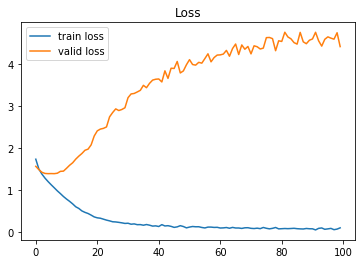

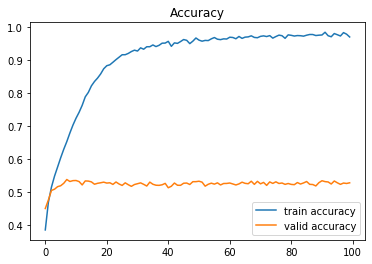

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()